In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def f(x):
    return x[0]**2+10*x[1]**2

def g(x):
    return np.array([2*x[0],20*x[1]])

# 函数的上帝视角和每一处的梯度

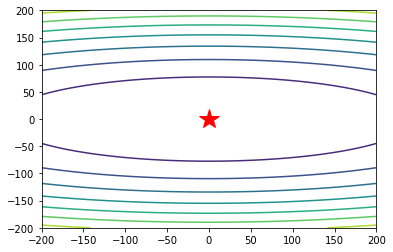

In [62]:
x = np.linspace(-200,200,1000)
y = np.linspace(-200,200,1000)
X, Y = np.meshgrid(x,y)
Z = X**2+10*Y**2

def contour(X,Y,Z,arr=None):
    plt.contour(X,Y,Z)
    plt.plot(0,0,color='red', marker='*',markersize=20)
    
    if arr is not None:
        arr = np.array(arr)
        for i in range(len(arr)-1):
            plt.plot(arr[i:i+2,0],arr[i:i+2,1])
               
contour(X,Y,Z,arr=None)

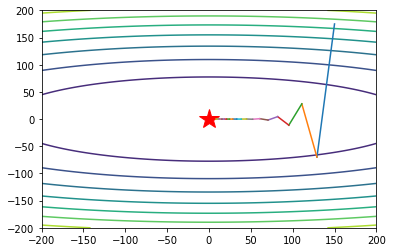

In [63]:
# 普通gradient descent
def gd(x_start,step,epoch,g,printf):
    x = np.array(x_start,dtype='float64')
    passing_dot = [x.copy()]
    for i in range(epoch-1):
        grad = g(x)
        x -= step*grad
        passing_dot.append(x.copy())
        if printf:
            print(f'Epoch {i} grad={grad} x={x}')
    return x,passing_dot

result, arr = gd(x_start=[150,175],step=0.07,epoch=20,g=g,printf=False)
contour(X,Y,Z,arr)

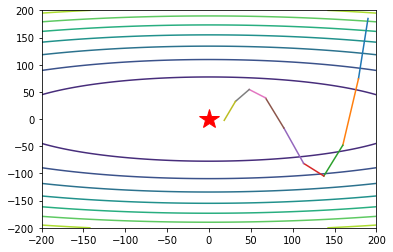

In [64]:
# gradient descent with momentum
def gdm(x_start,step,epoch,g,printf,discount):
    x = np.array(x_start,dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for i in range(epoch-1):
        grad = g(x)
        pre_grad = pre_grad*discount+grad
        x -= step*pre_grad
        passing_dot.append(x.copy())
        if printf:
            print(f'Epoch {i} grad={grad} x={x}')
    return x,passing_dot

result, arr = gdm(x_start=[190,185],step=0.03,epoch=10,g=g,printf=False,discount=0.7)
contour(X,Y,Z,arr)

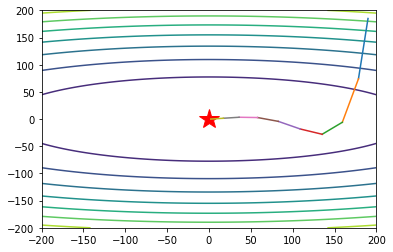

In [65]:
# Nesterov AG
def nag(x_start,step,epoch,g,printf,discount):
    x = np.array(x_start,dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for i in range(epoch-1):
        x_future = x - step*discount*pre_grad
        grad = g(x_future)
        pre_grad = pre_grad*discount+grad
        x -= step*pre_grad
        passing_dot.append(x.copy())
        if printf:
            print(f'Epoch {i} grad={grad} x={x}')
    return x,passing_dot

result, arr = nag(x_start=[190,185],step=0.03,epoch=10,g=g,printf=False,discount=0.8)
contour(X,Y,Z,arr)

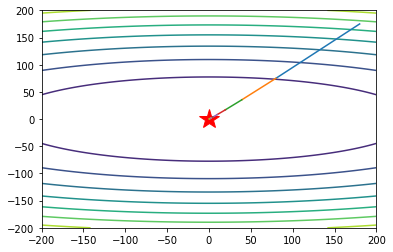

In [74]:
# rmsprop/adagrad
def rmsprop(x_start,step,epoch,g,printf,decay_rate):
    x = np.array(x_start,dtype='float64')
    passing_dot = [x.copy()]
    cache = np.array([0,0])
    for i in range(epoch-1):
        cache = decay_rate*cache+(1-decay_rate)*g(x)**2
        x -= step*g(x)/np.sqrt(cache+1e-8)
        passing_dot.append(x.copy())
        grad = g(x)
        if printf:
            print(f'Epoch {i} grad={grad} x={x}')
    return x,passing_dot

result, arr = rmsprop(x_start=[180,175],step=10,epoch=10,g=g,printf=False,decay_rate=0.99)
contour(X,Y,Z,arr)

In [58]:
# x = np.linspace(-1000,1000,100)
# y = np.linspace(-1000,1000,100)
# X, Y = np.meshgrid(x,y)
# Z = X*np.sin(Y)+Y
# plt.contour(X,Y,Z,cmap="jet")